In [1]:
import  pandas as pd
import nltk

In [2]:
df_result = pd.read_csv('C:/Users/Aimee/email_new_data2.csv',usecols=["email"])
df_result.head()

,email
0,testHello Paul Hennessy Write your email co...
1,"test,Hello Marina Aranda Write your email c..."
2,"Free leads in exchange for feedback!""Hello Th..."
3,"Free leads in exchange for feedback!""Hello De..."
4,"Free leads in exchange for feedback!""Hello De..."


In [3]:
from nltk.corpus import stopwords
import string 
ascii_str = string.printable
digits_str = string.digits
punctuation_str = string.punctuation
stop_words = stopwords.words('english')

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
def token(texts):
    if type(texts) is str:
        texts = texts.lower()
        token_text = " ".join([w for w in texts.split()])
        return token_text
df_result['email_token'] = df_result['email'].apply(lambda x: token(x)).astype('str') 

In [6]:
def remove_pun(texts):
    texts = texts.lower()
    remove_pun = "".join([word for word in texts if word not in punctuation_str])
#         clean_data = "".join([word for word in remove_pun if word in list(ascii_str)])
    return remove_pun
    
# df_result['email_nopun1'] = df_result['email_nopun'].apply(lambda x: remove_pun(x))
df_result['email_nopun'] = df_result['email_token'].apply(lambda x: remove_pun(x))

In [7]:
def remove_ascii(texts):
    clean_data = "".join([word for word in texts if word in list(ascii_str)])
    return clean_data

df_result['no_ascii'] = df_result['email_nopun'].apply(lambda x: remove_ascii(x))

In [8]:
def remove_stop(texts):
    word_tokens = word_tokenize(texts.lower()) 
    clean_data = " ".join([word for word in word_tokens if word not in stop_words])
    return clean_data
df_result['no_stopwords'] = df_result['no_ascii'].apply(lambda x: remove_stop(x))

In [9]:
import re
def no_digit(texts):
    word_tokens = word_tokenize(texts) 
    output=[]
    for i in word_tokens:
        output.append(re.sub(r'\d+', '',i))
    no_digit = " ".join([word for word in word_tokens if word in output])
    return no_digit
df_result['no_digits'] = df_result['no_stopwords'].apply(lambda x: no_digit(x))

In [10]:
noise_list = ['hello','hi','name','sorry','im','would',"html"]

def remove(texts):
    w = word_tokenize(texts.lower())
    remove_pun = " ".join([word for word in w if word not in noise_list])
    return remove_pun

df_result['emails'] = df_result['no_digits'].apply(lambda x: remove(x))

In [11]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
def lemma(texts):
    w = word_tokenize(texts.lower())
    lemmatizer=WordNetLemmatizer()
    lemma_w = ",".join(lemmatizer.lemmatize(word,pos="v") for word in w)
    
    return lemma_w
df_result['email1'] = df_result['emails'].apply(lambda x: lemma(x))

In [12]:
df_result.head()

,email,email_token,email_nopun,no_ascii,no_stopwords,no_digits,emails,email1
0,testHello Paul Hennessy Write your email co...,testhello paul hennessy write your email conte...,testhello paul hennessy write your email conte...,testhello paul hennessy write your email conte...,testhello paul hennessy write email content us...,testhello paul hennessy write email content us...,testhello paul hennessy write email content us...,"testhello,paul,hennessy,write,email,content,us..."
1,"test,Hello Marina Aranda Write your email c...","test,hello marina aranda write your email cont...",testhello marina aranda write your email conte...,testhello marina aranda write your email conte...,testhello marina aranda write email content us...,testhello marina aranda write email content us...,testhello marina aranda write email content us...,"testhello,marina,aranda,write,email,content,us..."
2,"Free leads in exchange for feedback!""Hello Th...","free leads in exchange for feedback!""hello thu...",free leads in exchange for feedbackhello thu h...,free leads in exchange for feedbackhello thu h...,free leads exchange feedbackhello thu hope don...,free leads exchange feedbackhello thu hope don...,free leads exchange feedbackhello thu hope don...,"free,lead,exchange,feedbackhello,thu,hope,dont..."
3,"Free leads in exchange for feedback!""Hello De...","free leads in exchange for feedback!""hello dej...",free leads in exchange for feedbackhello dejan...,free leads in exchange for feedbackhello dejan...,free leads exchange feedbackhello dejan hope d...,free leads exchange feedbackhello dejan hope d...,free leads exchange feedbackhello dejan hope d...,"free,lead,exchange,feedbackhello,dejan,hope,do..."
4,"Free leads in exchange for feedback!""Hello De...","free leads in exchange for feedback!""hello dei...",free leads in exchange for feedbackhello deird...,free leads in exchange for feedbackhello deird...,free leads exchange feedbackhello deirdre hope...,free leads exchange feedbackhello deirdre hope...,free leads exchange feedbackhello deirdre hope...,"free,lead,exchange,feedbackhello,deirdre,hope,..."


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train= df_result["email1"]
vect = TfidfVectorizer(ngram_range=(1,1), stop_words='english',min_df=0.01)
X_train_ = vect.fit_transform(X_train).toarray()

In [14]:
features = vect.get_feature_names()
data = pd.DataFrame(X_train_)
data.columns = features
data.head()

,access,advance,alternate,analystw,analytics,app,application,aranda,ash,bajajdata,...,websiteapplication,week,weeks,welcome,wellim,wheately,work,write,wwwdatainnovationsystemscom,youre
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211206,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.186578,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248377,0.0,0.0
2,0.163481,0.0,0.0,0.0,0.231334,0.0,0.213639,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.163481,0.0,0.0,0.0,0.231334,0.0,0.213639,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.163481,0.0,0.0,0.0,0.231334,0.0,0.213639,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [15]:
from sklearn.decomposition import PCA
N_components=2
pca = PCA(n_components=N_components)
pca_trans = pca.fit_transform(X_train_)

In [16]:
pca_com=pca.explained_variance_ratio_.view()
pca_com

array([0.39659216, 0.2192294 ])

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(pca_trans)
# labels = KMeans(3, random_state=0).fit_predict(pca_trans)

plt.figure('3 Cluster K-Means')

plt.scatter(pca_trans[:, 0], pca_trans[:, 1], c= kmeansoutput.labels_, s = 50, marker='*',alpha=0.5)
# plt.scatter(pca_trans, c="g", s = 50, marker='*',alpha=0.5)

plt.xlabel('Dividend Yield')

plt.ylabel('Returns')

plt.title('3 Cluster K-Means')

plt.show()

<Figure size 640x480 with 1 Axes>

In [23]:
from sklearn.cluster import KMeans
true_k = 3
n=100
model = KMeans(n_clusters=true_k, init='k-means++',n_init=30)
model.fit(X_train_)

# # print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
list_words=[]
for i in range(true_k):
#     print("Cluster %d:" % i) 
    for ind in order_centroids[i, :n]:
#         print('%s' % terms[ind])
        list_words.append(terms[ind])

In [24]:
def chunks(l,n):
    list_=[l[i:i + n] for i in range(0, len(l), n)]
    lis=[]
    for l in list_:
        lis.append(" ".join(l))
    return lis 
sep_list=chunks(list_words,n)

In [25]:
key_list=[i for i in range(true_k)]
cluster_dict=dict(zip(key_list, sep_list))

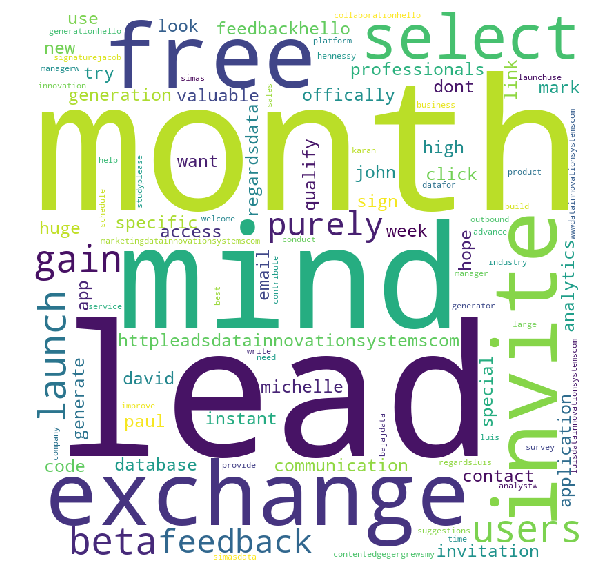

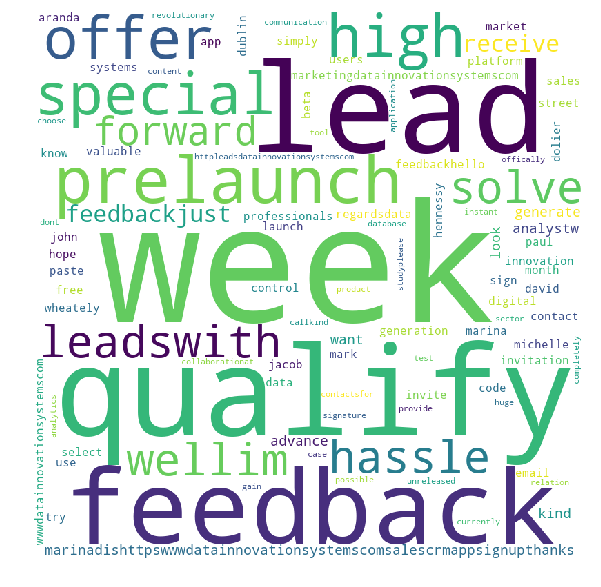

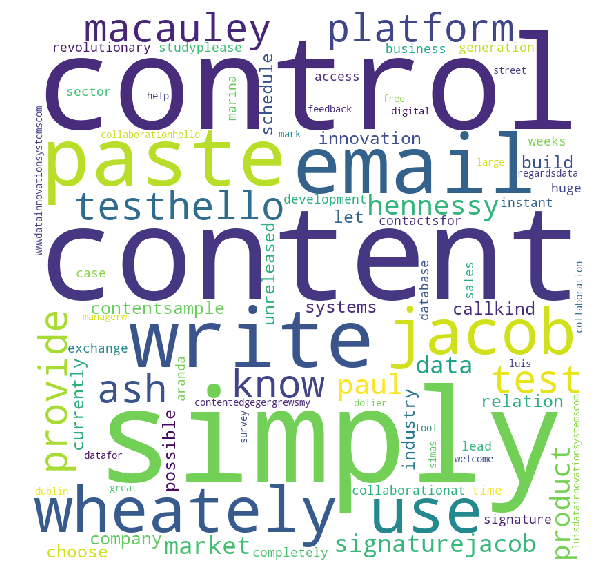

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
for v in cluster_dict.values():
    features = vect.get_feature_names()
    words = " ".join(features)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 

                    min_font_size = 10).generate(v) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [27]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# features = vect.get_feature_names()
# words = " ".join(features)
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
                
#                 min_font_size = 10).generate(str2) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show() 
# import numpy as np
# list_=np.array_split(list_words,2)
